In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=["date"],index_col = "date")
df["month"] = df.index.month
df["year"] = df.index.year

df = df[["month","year","value"]]

In [ ]:
# Clean data
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[
        (df["value"] <= df["value"].quantile(1-0.025)) &
        (df["value"] >= df["value"].quantile(0.025))
       ]

df

,month,year,value
date,,,
2016-05-19,5,2016,19736
2016-05-26,5,2016,18060
2016-05-27,5,2016,19997
2016-05-28,5,2016,19044
2016-05-29,5,2016,20325
...,...,...,...
2019-11-24,11,2019,138875
2019-11-29,11,2019,171584
2019-11-30,11,2019,141161


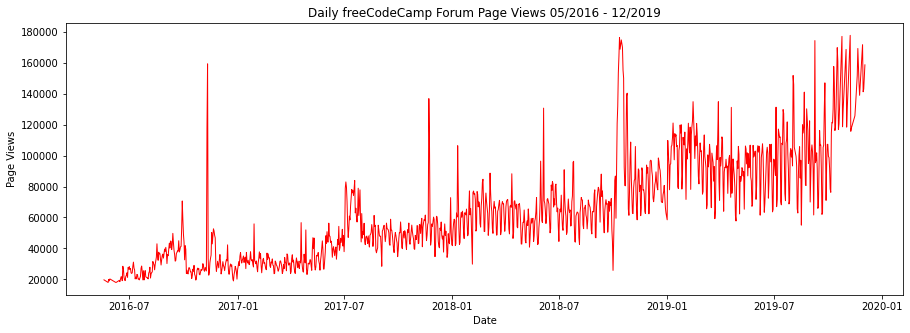

In [ ]:
#Draw line plot
#The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
#The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df.value, color="red", linewidth = 1)
ax.set_title("Daily freeCodeCamp Forum Page Views 05/2016 - 12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
plt.show()

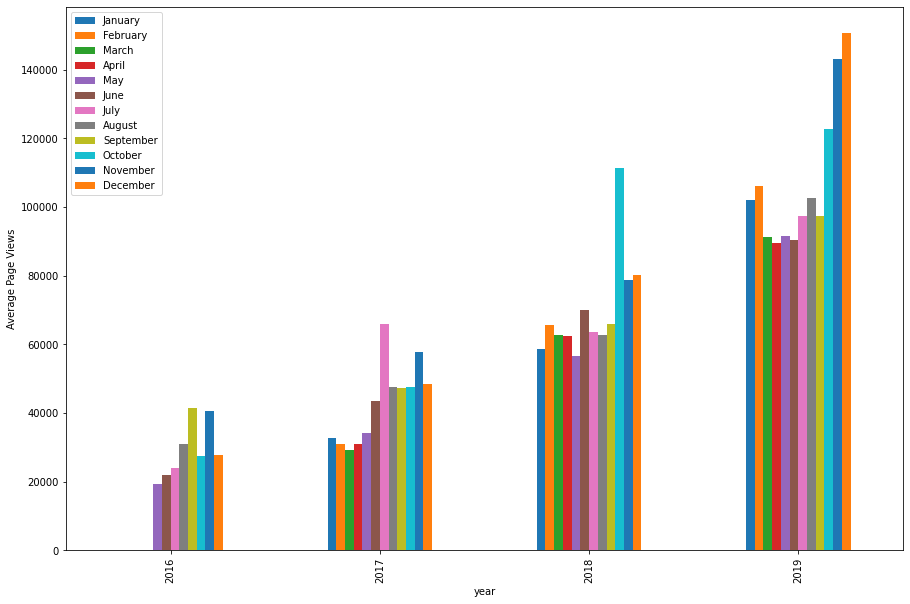

In [45]:
# Copy and modify data for monthly bar plot 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

df_bar = df.groupby(["year","month"])["value"].mean().unstack()



fig = df_bar.plot(kind="bar",figsize=(15,10), ylabel = "Average Page Views").figure


months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.legend(months)
plt.show()

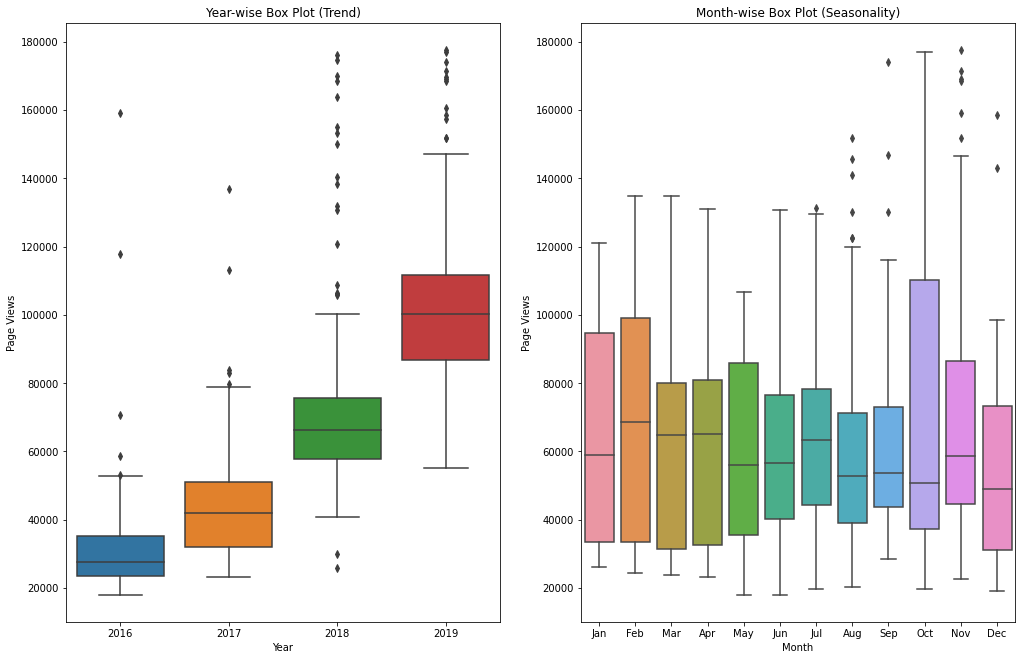

In [11]:
# Draw box plots (using Seaborn) 
#These box plots should show how the values are distributed within a given year or month and how it compares over time. 
#The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". 
#Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box["date"]]
df_box["month"] = [d.strftime('%b') for d in df_box["date"]]
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
fig.tight_layout(pad = 5.0)

ax[0] = sns.boxplot(data=df, x=df.year, y=df.value, ax = ax[0])
ax[0].set_title("Year-wise Box Plot (Trend)") 
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")

ax[1] = sns.boxplot(data=df_box, x=df_box.month, y=df_box.value, ax = ax[1])
ax[1].set_title("Month-wise Box Plot (Seasonality)") 
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Page Views")

plt.show()